C:\Users\Kois\AppData\Local\Temp/ipykernel_4524/2053740957.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = z.astype(np.float)


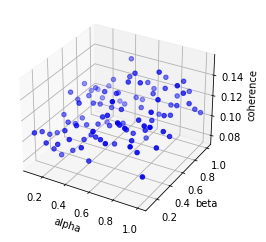

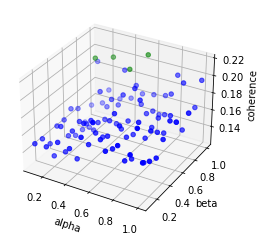

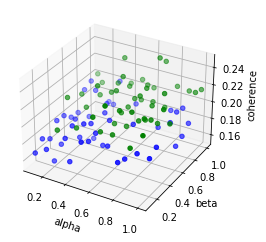

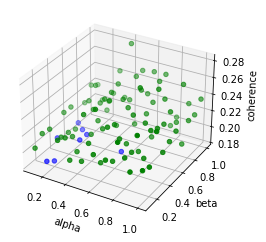

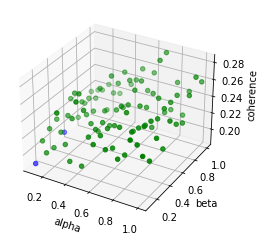

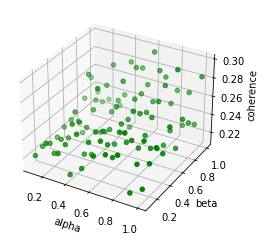

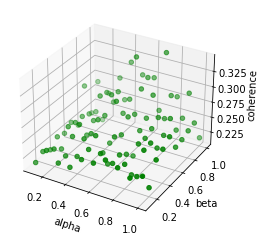

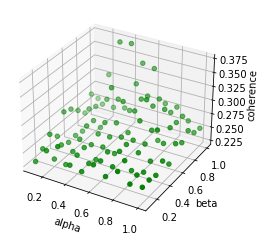

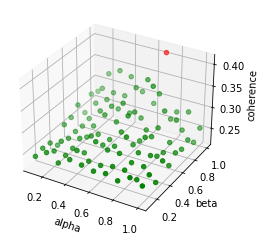

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

points = pd.read_csv('testLDA - Copy.csv')


def pltcolor(lst):
    cols=[]
    for l in lst:
        if l>=0.4:
            cols.append('red')
        elif l<0.2:
            cols.append('blue')
        else:
            cols.append('green')
    return cols

# Create the color
for k_ in range (2,11,1):  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    df = points[points['K'] == k_]
    x = df['alpha'].values
    y = df['beta'].values
    z = df['coherence'].values
    z = z.astype(np.float)
    
    ax.scatter(x, y, z,c=pltcolor(z), marker='o')
    ax.set_xlabel('alpha')
    ax.set_ylabel('beta')
    ax.set_zlabel('coherence')

    plt.show()

C:\Users\Kois\AppData\Local\Temp/ipykernel_4524/1315790693.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = z.astype(np.float)


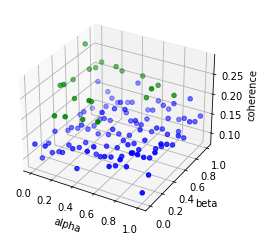

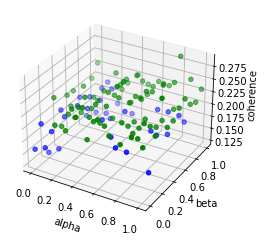

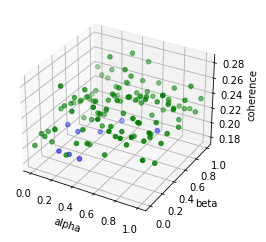

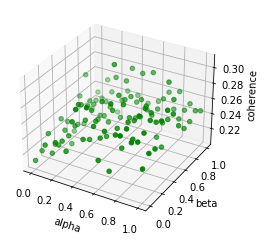

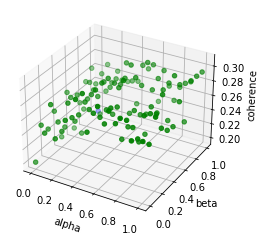

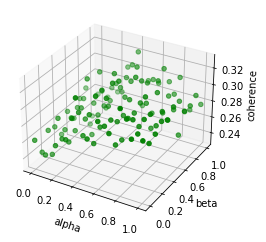

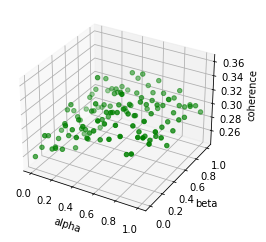

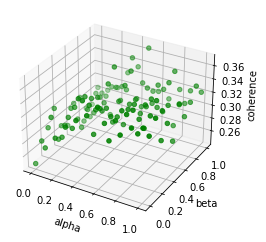

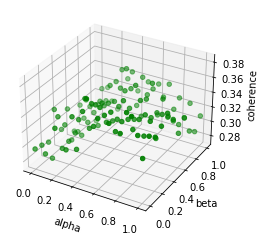

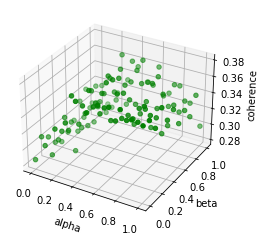

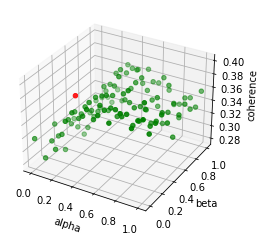

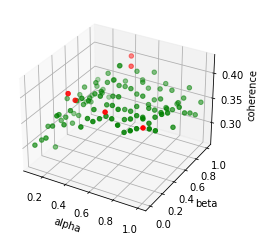

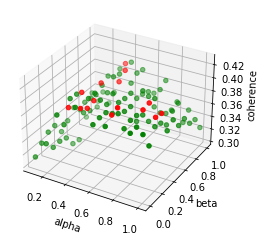

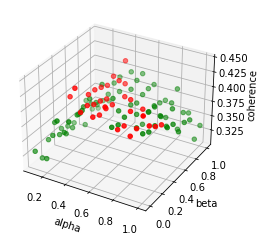

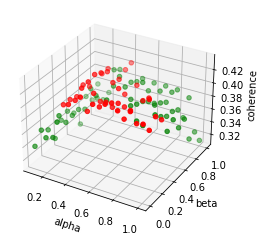

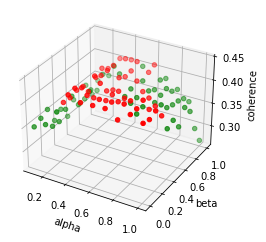

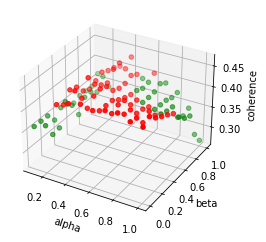

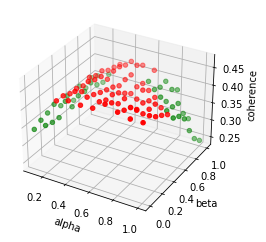

In [6]:
#gibbs
import os

pkl_files = []
# directory of where the .pkl files are located since the data is being extracted from there
for file in os.listdir("C:/Users/Kois/LDA_Code/LDA_Code/pickle lda"):
    if file.endswith(".pkl"):
        pkl_files.append(file.replace('.pkl',""))
        
csv = [['k','alpha','beta','coherence']]
for row in pkl_files:
    cols = row.split("_")
    csv.append([cols[1][1:], cols[2][1:], cols[3][1:], cols[4][1:]])

    
df_pkl = pd.DataFrame (csv[1:], columns = ['K', 'alpha','beta','coherence'])
df_pkl['K']=df_pkl['K'].astype(int)
df_pkl['alpha']=df_pkl['alpha'].astype(int)
df_pkl['beta']=df_pkl['beta'].astype(int)
df_pkl['coherence']=df_pkl['coherence'].astype(float)

df_pkl['alpha'] = df_pkl['alpha'].div(10)
df_pkl['beta'] = df_pkl['beta'].div(10)
df_pkl=df_pkl.sort_values(['K','alpha','beta'])
# Create the color

for k_ in range (2,20,1):  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    df = df_pkl[df_pkl['K'] == k_]
    x = df['alpha'].values
    y = df['beta'].values
    z = df['coherence'].values
    z = z.astype(np.float)
    
    ax.scatter(x, y, z,c=pltcolor(z), marker='o')
    ax.set_xlabel('alpha')
    ax.set_ylabel('beta')
    ax.set_zlabel('coherence')

    plt.show()

In [3]:
df_pkl.head(30)

,K,alpha,beta,coherence
847,2,0.0,0.0,0.259081
849,2,0.0,0.1,0.120625
850,2,0.0,0.2,0.109083
851,2,0.0,0.3,0.119457
852,2,0.0,0.4,0.101761
853,2,0.0,0.5,0.103197
854,2,0.0,0.6,0.115790
855,2,0.0,0.7,0.113430
856,2,0.0,0.8,0.097680
857,2,0.0,0.9,0.115790


In [4]:

df_pkl

,K,alpha,beta,coherence
847,2,0.0,0.0,0.259081
849,2,0.0,0.1,0.120625
850,2,0.0,0.2,0.109083
851,2,0.0,0.3,0.119457
852,2,0.0,0.4,0.101761
...,...,...,...,...
843,17,0.0,0.6,0.304334
844,17,0.0,0.7,0.206721
845,17,0.0,0.8,0.378789
846,17,0.0,0.9,0.375807


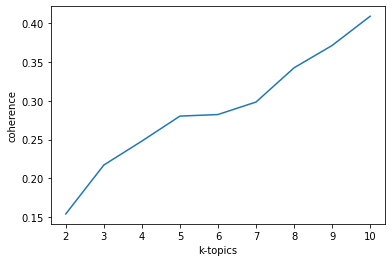

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

points = pd.read_csv('testLDA - Copy.csv')
csv=points.values.tolist()

summary = {}
# take the maximum coherence found at that k after different alpha and beta combination model training
for k,alpha,beta,coherence in csv[1:]:
    summary[k] = max(summary.get(k,0), float(coherence))

# convert dictoinary to list of [(key, value),...] pairs
to_plot = sorted(summary.items(),key=lambda k:int(k[0]))


import matplotlib.pyplot as plt

# extract the x and y values separately for plotting
x = [item[0] for item in to_plot]
y = [item[1] for item in to_plot]

plt.plot(x, y)

plt.ylabel("coherence")
plt.xlabel("k-topics")

plt.show()

In [10]:
csv

[[2.0, 0.1, 0.1, 0.106978439],
 [2.0, 0.1, 0.2, 0.102242753],
 [2.0, 0.1, 0.3, 0.093712273],
 [2.0, 0.1, 0.4, 0.089251029],
 [2.0, 0.1, 0.5, 0.101668585],
 [2.0, 0.1, 0.6, 0.118372977],
 [2.0, 0.1, 0.7, 0.105612669],
 [2.0, 0.1, 0.8, 0.11599322],
 [2.0, 0.1, 0.9, 0.103417853],
 [2.0, 0.1, 1.0, 0.09930038],
 [2.0, 0.2, 0.1, 0.100629879],
 [2.0, 0.2, 0.2, 0.088682683],
 [2.0, 0.2, 0.3, 0.076599861],
 [2.0, 0.2, 0.4, 0.103221675],
 [2.0, 0.2, 0.5, 0.095954629],
 [2.0, 0.2, 0.6, 0.095840368],
 [2.0, 0.2, 0.7, 0.112580851],
 [2.0, 0.2, 0.8, 0.114980898],
 [2.0, 0.2, 0.9, 0.09918743],
 [2.0, 0.2, 1.0, 0.105936925],
 [2.0, 0.3, 0.1, 0.102802961],
 [2.0, 0.3, 0.2, 0.110061877],
 [2.0, 0.3, 0.3, 0.084572431],
 [2.0, 0.3, 0.4, 0.125198119],
 [2.0, 0.3, 0.5, 0.098121558],
 [2.0, 0.3, 0.6, 0.113927686],
 [2.0, 0.3, 0.7, 0.107432052],
 [2.0, 0.3, 0.8, 0.08339707],
 [2.0, 0.3, 0.9, 0.120966671],
 [2.0, 0.3, 1.0, 0.093545498],
 [2.0, 0.4, 0.1, 0.110964319],
 [2.0, 0.4, 0.2, 0.118345785],
 [2.0, 0.4, 